# Exploratory Data Analysis

Inspiration :
- https://www.kaggle.com/artgor/eda-and-models

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils import printmd
from src.dataset.utils import df_empty
from src.dataset.make_dataset import Dataset
from src.features.utils import *
from src.features.build_features import *
from src.visualization.visualize import *
from src.visualization.utils import *

import numpy as np
import pandas as pd

%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("deep")

import warnings
warnings.filterwarnings("ignore")

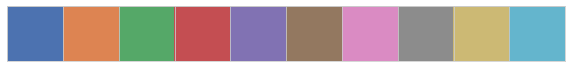

In [3]:
sns.palplot(sns.color_palette())

In [4]:
ds = Dataset()
ds.load_dataset()
#build_processed_dataset(ds)

In [5]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['label'] = y

In [6]:
mask_notfraud = (X['label']==0)
mask_isfraud = (X['label']==1)

## Identity information

In [ ]:
def count_identity_instances():
    df = df_empty(['col', 'train_count', 'test_count', 'type'], dtypes=[str, np.float, np.float, str])
    df['col'] = ["id_"+str(i).zfill(2) for i in range(1,39)]
    df['train_count'] = df['col'].apply(lambda col: len(X[col].unique()))
    df['test_count'] = df['col'].apply(lambda col: len(X_test[col].unique()))
    df['type'] = df['col'].apply(lambda col: X[col].dtype)
    df = df.set_index('col')
    return df
    
# count_identity_instances()

#### id_01

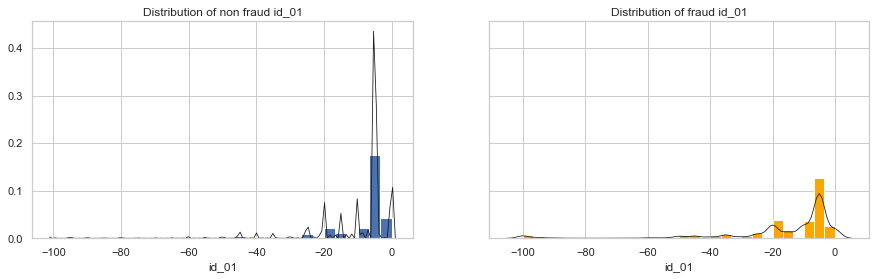

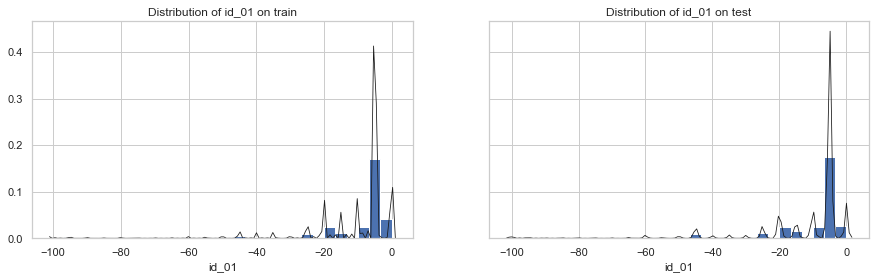

In [53]:
hist_isfraud(X, 'id_01', 30)
hist_train_test(X, X_test, 'id_01', 30)

This looks like a `capture_day` variable. Heavily skewed towards -5 and peaks of multiple of 5, **we should be able to modulo 5 or bin this column**.

#### id_02

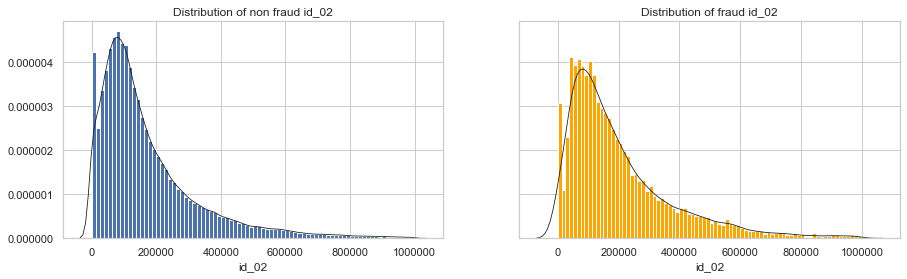

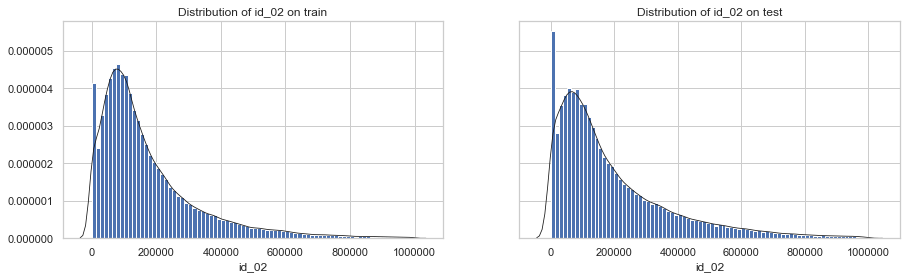

In [54]:
hist_isfraud(X, 'id_02', 80)
hist_train_test(X, X_test, 'id_02', 80)

**There's a skew, let's log this thing :)**

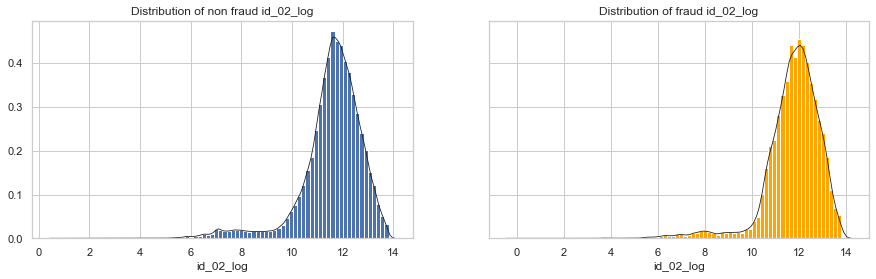

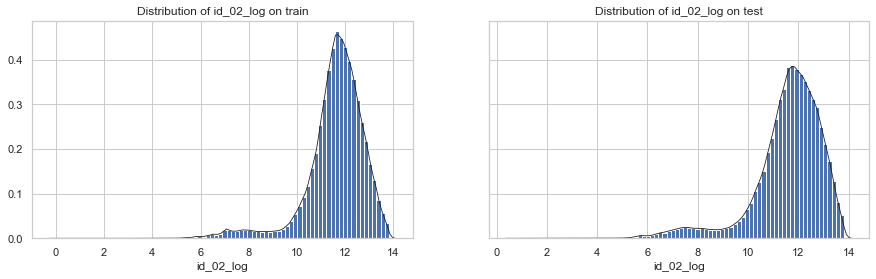

In [55]:
X['id_02_log']=np.log(X['id_02'])
X_test['id_02_log']=np.log(X_test['id_02'])

hist_isfraud(X, 'id_02_log', 80)
hist_train_test(X, X_test, 'id_02_log', 80)

#### id_03

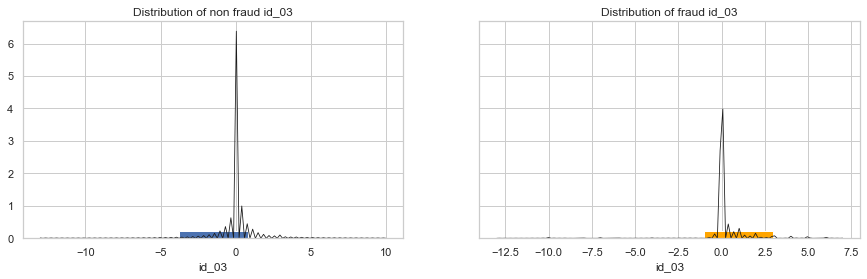

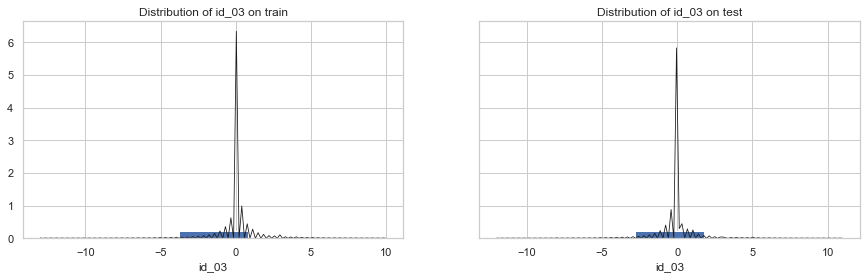

In [56]:
hist_isfraud(X, 'id_03', 5)
hist_train_test(X, X_test, 'id_03', 5)

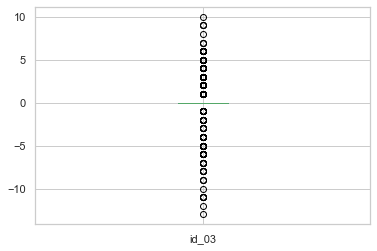

In [41]:
X[X['label']==0]['id_03'].dropna().plot.box()

**I'm not sure this seems super useful :/**

#### id_04

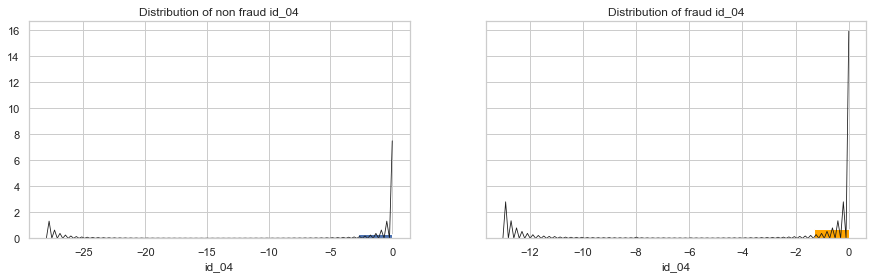

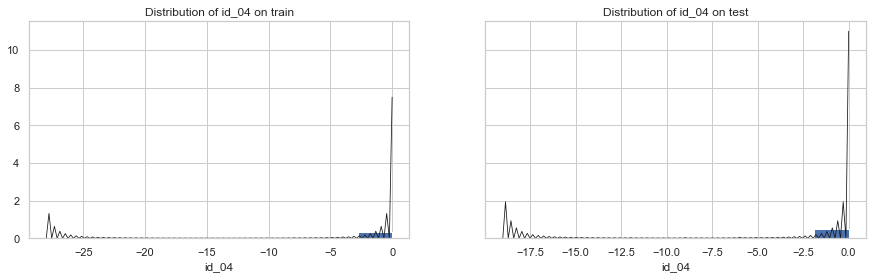

In [57]:
hist_isfraud(X, 'id_04', 10)
hist_train_test(X, X_test, 'id_04', 10)

#### id_05

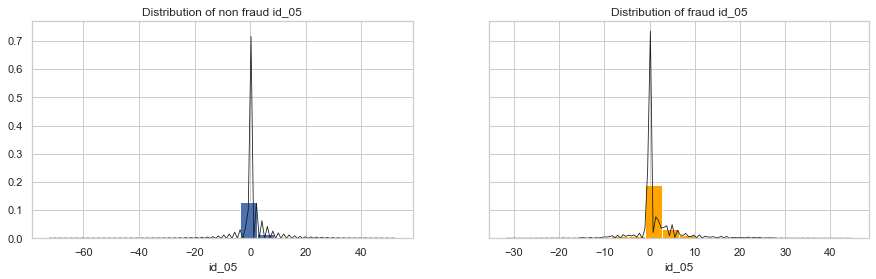

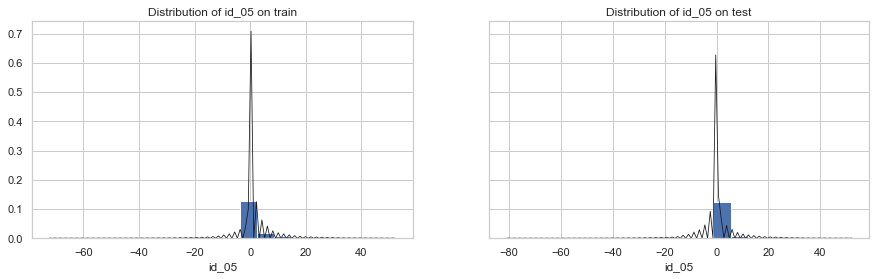

In [58]:
hist_isfraud(X, 'id_05', 20)
hist_train_test(X, X_test, 'id_05', 20)

#### id_06

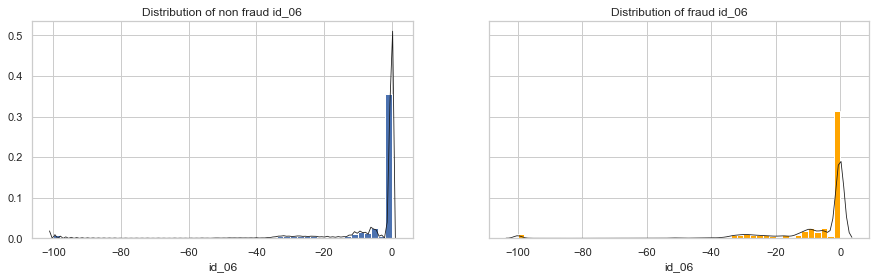

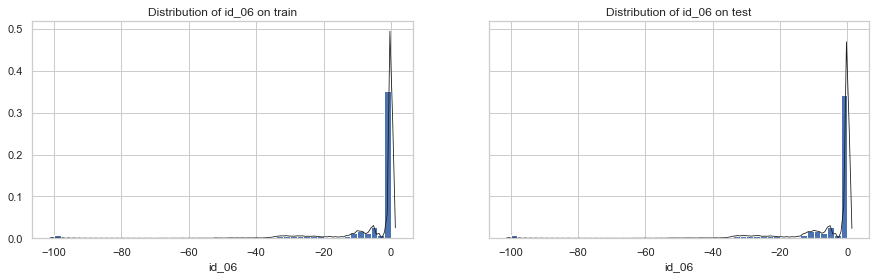

In [59]:
hist_isfraud(X, 'id_06', 50)
hist_train_test(X, X_test, 'id_06', 50)

#### id_07

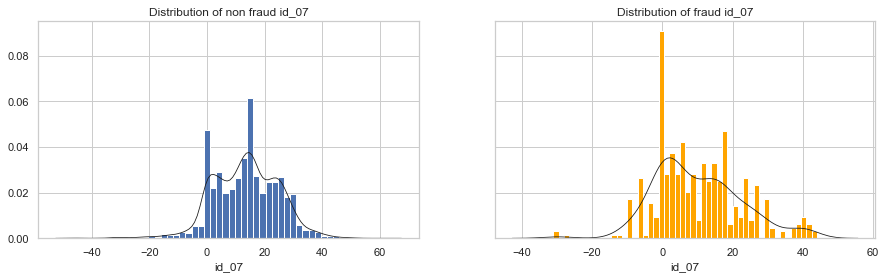

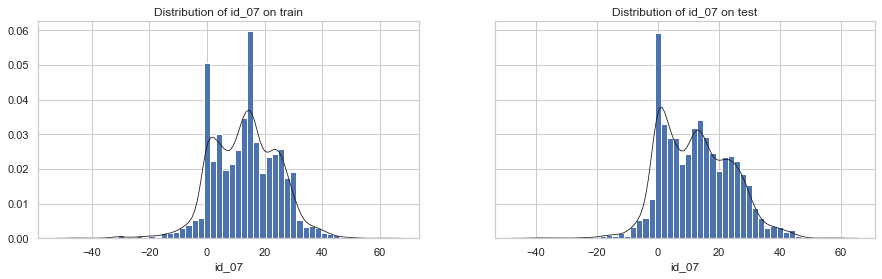

In [60]:
hist_isfraud(X, 'id_07', 50)
hist_train_test(X, X_test, 'id_07', 50)

#### id_08

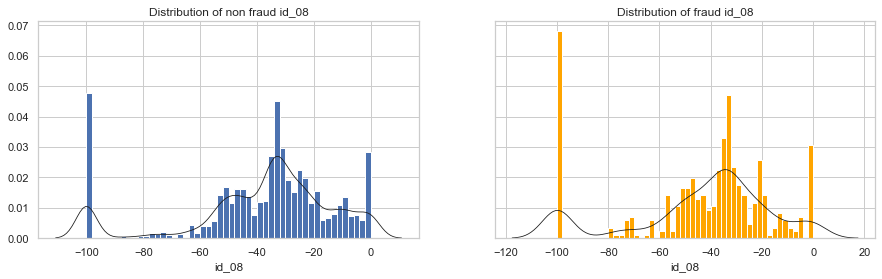

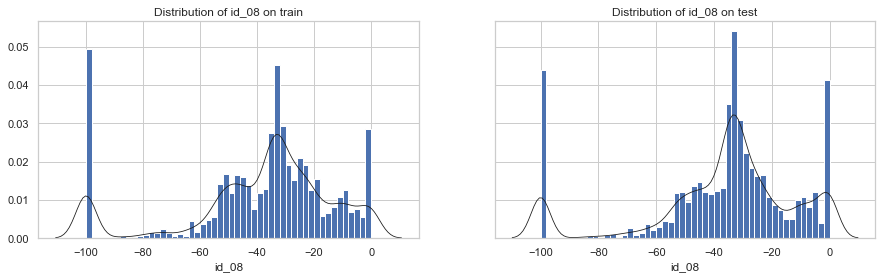

In [61]:
hist_isfraud(X, 'id_08', 50)
hist_train_test(X, X_test, 'id_08', 50)

**Nothing serious :/**

#### id_09

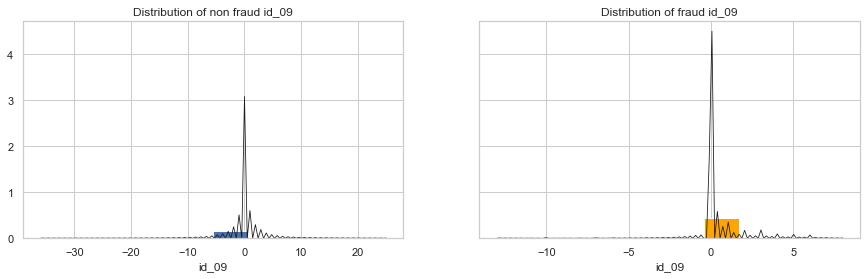

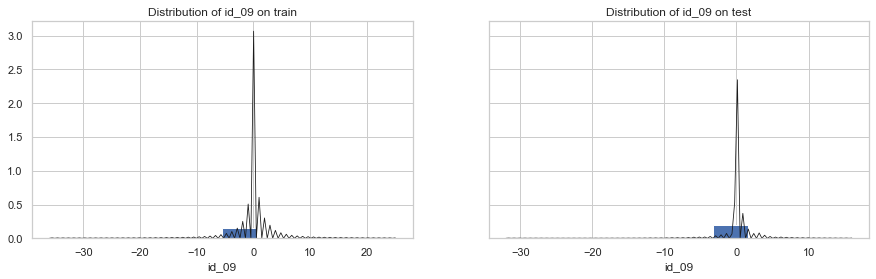

In [62]:
hist_isfraud(X, 'id_09', 10)
hist_train_test(X, X_test, 'id_09', 10)

#### id_10

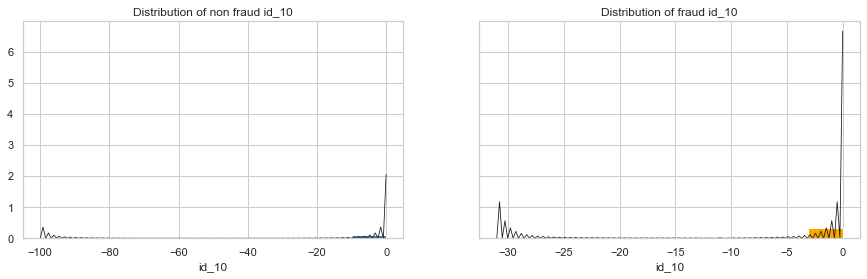

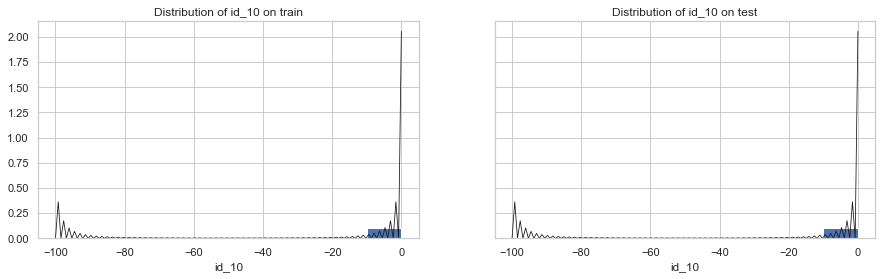

In [63]:
hist_isfraud(X, 'id_10', 10)
hist_train_test(X, X_test, 'id_10', 10)

#### id_11

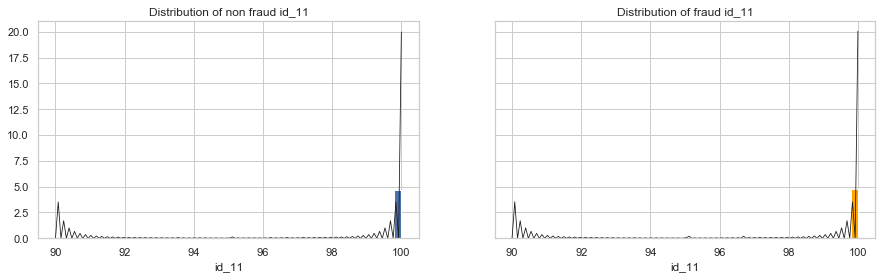

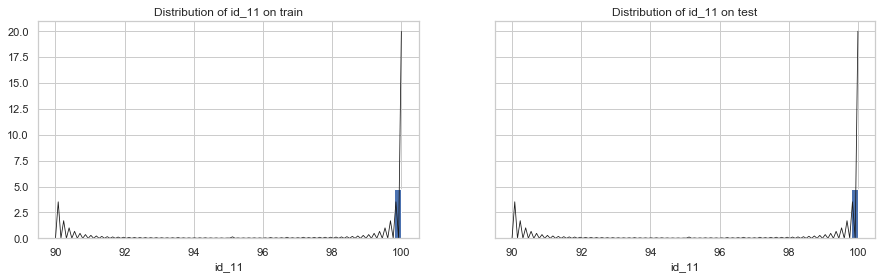

In [64]:
hist_isfraud(X, 'id_11', 50)
hist_train_test(X, X_test, 'id_11', 50)

#### Any jointplots to build ?

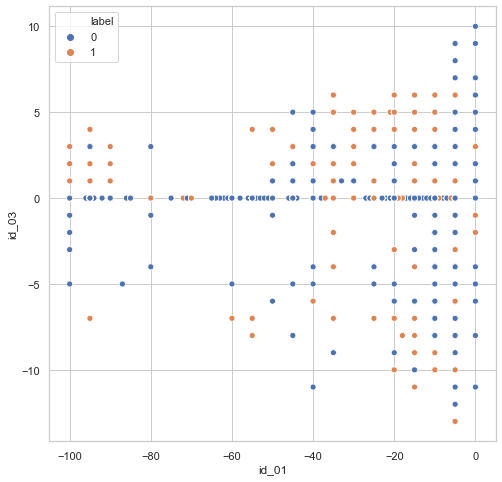

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="id_01", y="id_03", data=X, hue='label', ax=ax)
fig.show()

In [ ]:
g = sns.FacetGrid(X[["id_03", "label"]], col="label", col_wrap=2, sharex=False, sharey=False, size=4)
g = g.map(sns.distplot, "id_03", kde=False)

#### id_12 --> id_38 + DeviceType and DeviceInfo : all categorical

In [8]:
X[['id_12', 'id_15', 'id_16']].head(5)

,id_12,id_15,id_16
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,NotFound,New,NotFound


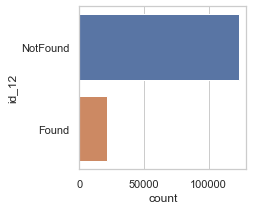

In [78]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(y="id_12", data=X)
fig.show()

In [ ]:
#for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:


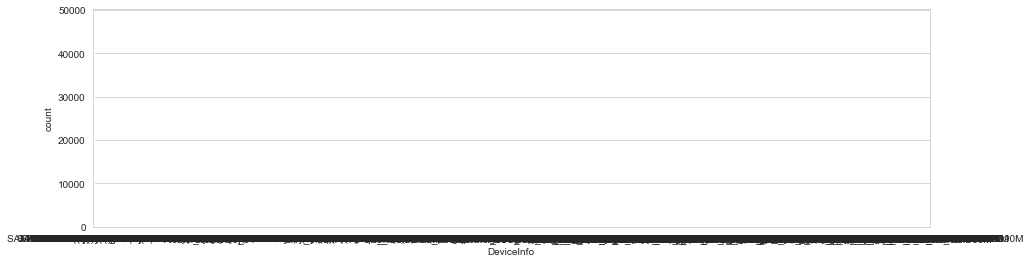

In [16]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="DeviceInfo", data=X)
fig.show()

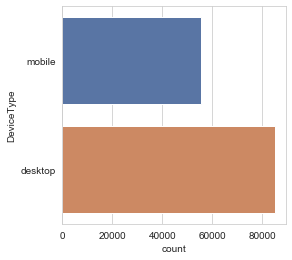

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(y="DeviceType", data=X)
fig.show()

## Transaction Data

In [12]:
def count_transaction_instances():
    df = df_empty(['col', 'train_count', 'test_count', 'type'], dtypes=[str, np.float, np.float, str])
    df['col'] = ds.transaction_cols_categorical
    df['train_count'] = df['col'].apply(lambda col: len(X[col].unique()))
    df['test_count'] = df['col'].apply(lambda col: len(X_test[col].unique()))
    df['type'] = df['col'].apply(lambda col: X[col].dtype)
    df = df.set_index('col')
    return df
    
# count_transaction_instances()

#### TransactionDT

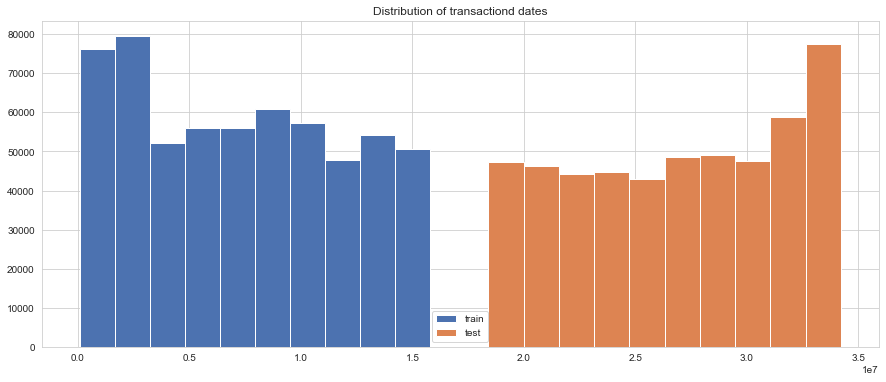

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(ds.X_train['TransactionDT'], label='train');
ax.hist(ds.X_test['TransactionDT'], label='test');
ax.legend();
ax.set_title('Distribution of transactiond dates');
fig.show()

#### TransactionAmt

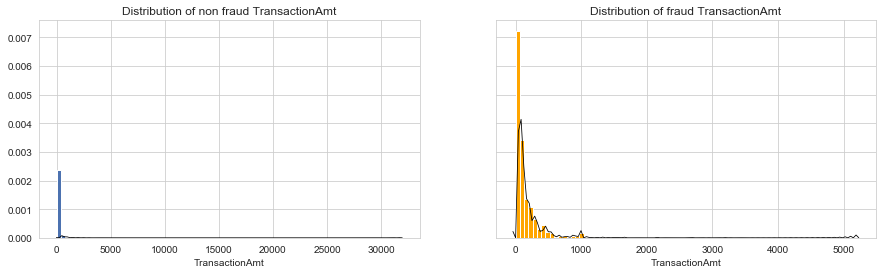

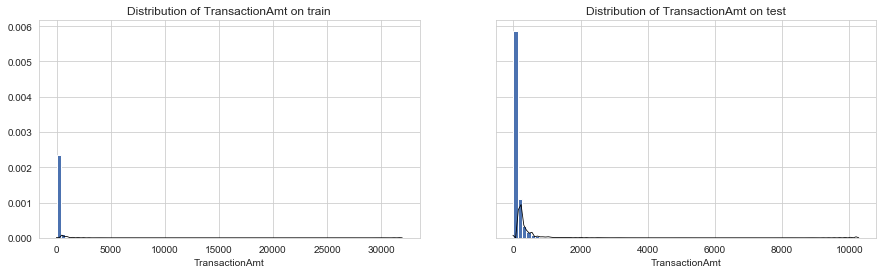

In [18]:
hist_isfraud(X, 'TransactionAmt', 80)
hist_train_test(X, X_test, 'TransactionAmt', 80)

#### C1 --> C14

#### D1 --> D9

#### Categorical columns

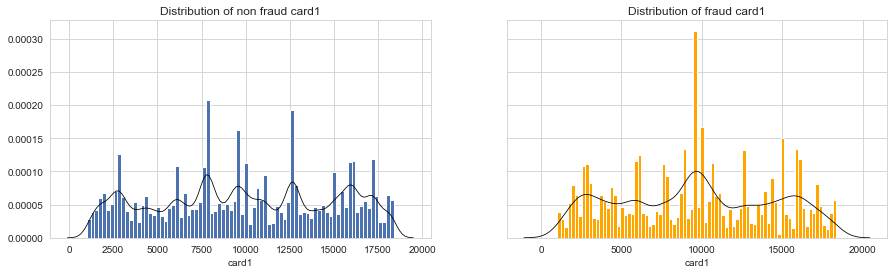

In [11]:
hist_isfraud(X, 'card1', 80)

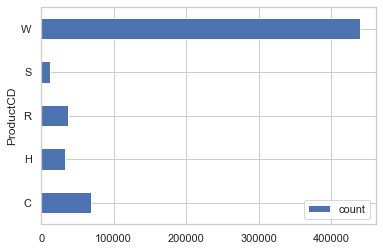

In [30]:
fig, ax = plt.subplots()
value_counts(X, 'ProductCD').plot(kind='barh', y="count", x="ProductCD", ax=ax)

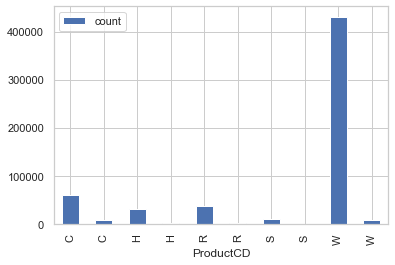

In [31]:
fig, ax = plt.subplots()
value_counts_byfraud(X, 'ProductCD').plot.bar(y="count", x="ProductCD", ax=ax)

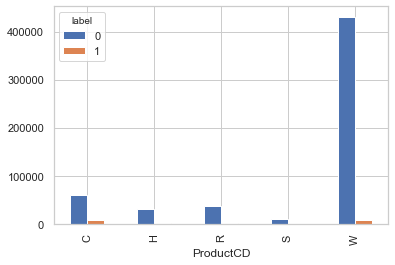

In [32]:
fig, ax = plt.subplots()
value_counts_byfraud(X, 'ProductCD').pivot(index='ProductCD', columns='label', values='count').reset_index().plot.bar(x="ProductCD", ax=ax)

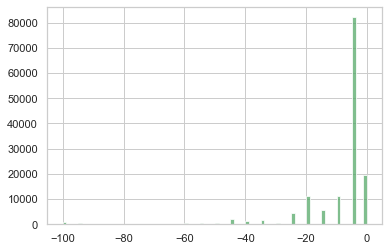

In [33]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(X['id_01'], 80, facecolor='g', alpha=0.75)

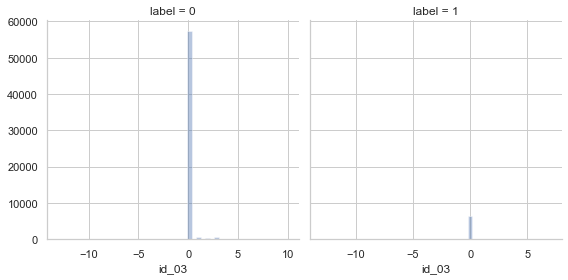

In [77]:
g = sns.FacetGrid(X[["id_03", "label"]], col="label", col_wrap=2, sharex=False, sharey=True, size=4)
g = g.map(sns.distplot, "id_03", kde=False)